# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://research.google.com/colaboratory/) или на локальном компьютере.

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST
from sklearn.datasets import load_digits
digits = load_digits()

"bash" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [3]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



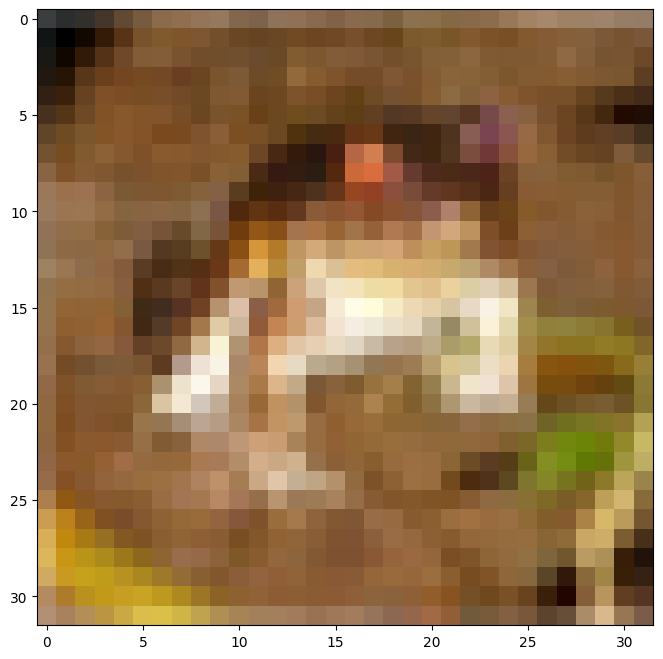

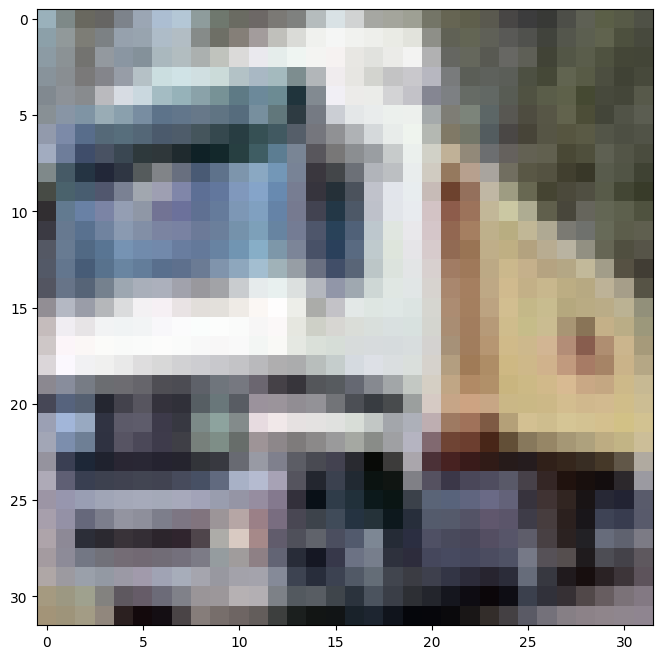

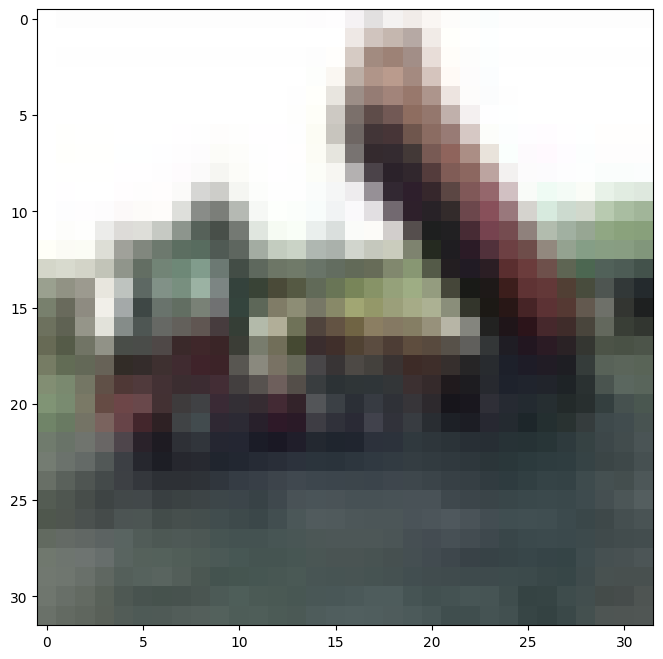

In [8]:
plt.imshow(X_train[0].astype(np.uint8))
plt.show()
plt.imshow(X_train[1].astype(np.uint8))
plt.show()
plt.imshow(X_train[2].astype(np.uint8))
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив.

In [4]:
from sklearn.model_selection import train_test_split

X_train = X_train.reshape((X_train.shape[0], 32 * 32 * 3))
X_test = X_test.reshape((X_test.shape[0], 32 * 32 * 3))

In [11]:
X_train.shape

(50000, 3072)

1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке.

In [13]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [14]:
y = classifier.predict(X_test)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки.


10000 50000


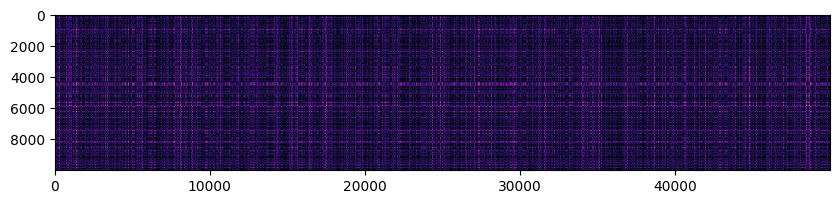

In [15]:
dists = classifier.compute_distances_no_loops(X_test)
print(X_test.shape[0], X_train.shape[0])
plt.imshow(dists, cmap='magma')


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [16]:
np.mean(y == y_test)

0.3539

1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

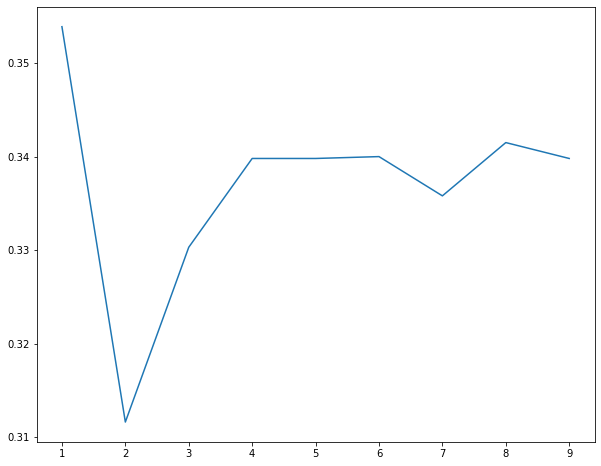

In [11]:
accuracies = []
for k in range(1, 10):
    y = classifier.predict(X_test, k)
    accuracy = np.mean(y == y_test)
    accuracies.append(accuracy)

plt.plot(range(1, 10), accuracies)

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [24]:
Xsplit = np.split(X_train, 10)
ysplit = np.split(y_train, 10)
i = 1
X_val = Xsplit[i]
y_val = ysplit[i]

part_len = X_val.shape[0]
print(part_len)
X_train_ = np.concatenate((X_train[0:part_len * i],X_train[part_len*(i+1):]))

5000


(array([-71.71074, -74.05614, -69.5538 , ...,  -3.63908, -33.8503 ,
        -42.38186]),
 array([-70.71074, -54.05614, -78.5538 , ..., -81.63908, -54.8503 ,
        -74.38186]))

In [41]:
accuracies = []
for k in range(1, 10):
    Xsplit = np.split(X_train, 10)
    ysplit = np.split(y_train, 10)
    tmp_accuracies = []
    for i in range(10):
        X_val = Xsplit[i]
        y_val = ysplit[i]
        part_len = X_val.shape[0] 
        X_train_ = np.concatenate((X_train[0:part_len * i],X_train[part_len*(i+1):]))
        y_train_ = np.concatenate((y_train[0:part_len * i],y_train[part_len*(i+1):]))
        
        classifier = KNearestNeighbor()
        classifier.train(X_train, y_train)
        y = classifier.predict(X_val, k)
        accuracy = np.mean(y == y_val)
        tmp_accuracies.append(accuracy)
    accuracies.append(np.mean(tmp_accuracies))


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [56]:
best_k = np.argmax(accuracies) + 1
best_classifier = KNearestNeighbor()
best_classifier.train(X_train, y_train)
y = best_classifier.predict(X_test)
print("accuracy ", np.mean(y == y_test))
print("k ", best_k)

accuracy  0.3539


1.11 Сделайте выводы по результатам 1 части задания.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки (X_train, y_train, X_test, y_test, X_val, y_val). Создайте также небольшую выборку из обучающей, на которой будет проверяться правильность работы кода (X_dev, y_dev). Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

[130.71074 136.05614 132.5538  130.14036 135.44238 131.85358 131.05044
 136.24616 132.58144 131.56886]


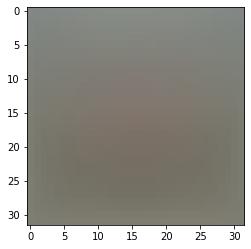

NameError: name 'X_val' is not defined

In [12]:
#mean_image = np.mean(X_train, axis=0)
#print(mean_image[:10])
#plt.figure(figsize=(4,4))
#plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
#plt.show()


#X_train -= mean_image
#X_val -= mean_image
#X_test -= mean_image
#X_dev -= mean_image


#X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
#X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
#X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
#X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])


#print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [ ]:

from scripts.classifiers.linear_svm import svm_loss_naive
import time


W = np.random.randn(X_train.shape[1], 10) * 0.0001

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))


2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [ ]:

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [ ]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [ ]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

In [ ]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [ ]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

2.9 Сделайте выводы по второй части задания

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки (X_train, y_train, X_test, y_test, X_val, y_val). Создайте также небольшую выборку из обучающей, на которой будет проверяться правильность работы кода (X_dev, y_dev). Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [5]:
X_dev = X_train[:1000]
y_dev = y_train[:1000]

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)
print("X_dev: ", X_dev.shape)
print("y_dev: ", X_dev.shape)


X_train:  (50000, 3072)
y_train:  (50000,)
X_test:  (10000, 3072)
y_test:  (10000,)
X_dev:  (1000, 3072)
y_dev:  (1000, 3072)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[130.71074 136.05614 132.5538  130.14036 135.44238 131.85358 131.05044
 136.24616 132.58144 131.56886]


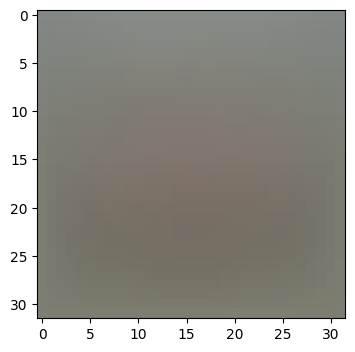

(50000, 3073) (10000, 3073) (1000, 3073)


In [6]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()


X_train -= mean_image
X_test -= mean_image
X_dev -= mean_image


X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])


print(X_train.shape, X_test.shape, X_dev.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [6]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(X_train.shape[1], 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.610621
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [7]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -24.221584 analytic: -24.221580, relative error: 6.670735e-08
numerical: 2.830374 analytic: 2.830377, relative error: 5.277241e-07
numerical: -0.761353 analytic: -0.761349, relative error: 2.712676e-06
numerical: 7.729889 analytic: 7.729891, relative error: 1.153904e-07
numerical: -23.338536 analytic: -23.338533, relative error: 6.810211e-08
numerical: -1.238769 analytic: -1.238766, relative error: 1.425083e-06
numerical: -3.871504 analytic: -3.871499, relative error: 6.476086e-07
numerical: -0.440906 analytic: -0.440903, relative error: 3.925739e-06
numerical: -1.722231 analytic: -1.722227, relative error: 1.378158e-06
numerical: 1.679990 analytic: 1.679993, relative error: 8.849134e-07
numerical: 6.166887 analytic: 6.170059, relative error: 2.571270e-04
numerical: 7.473494 analytic: 7.479124, relative error: 3.764910e-04
numerical: -24.642785 analytic: -24.642097, relative error: 1.396692e-05
numerical: 0.935002 analytic: 0.935456, relative error: 2.428679e-04
numerical: 4

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [8]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.610621e+00 computed in 0.306180s
vectorized loss: 2.610621e+00 computed in 0.028718s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [7]:
from scripts.classifiers import Softmax
sm = Softmax()
# tic = time.time()
loss_hist = sm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
# toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 398.215216
iteration 100 / 1500: loss 234.534294
iteration 200 / 1500: loss 142.170140
iteration 300 / 1500: loss 86.185088
iteration 400 / 1500: loss 52.250325
iteration 500 / 1500: loss 31.681132
iteration 600 / 1500: loss 19.213368
iteration 700 / 1500: loss 11.656218
iteration 800 / 1500: loss 7.075582
iteration 900 / 1500: loss 4.299112
iteration 1000 / 1500: loss 2.616200
iteration 1100 / 1500: loss 1.596125
iteration 1200 / 1500: loss 0.977817


KeyboardInterrupt: 

In [9]:
X_val = X_train[:1000]
y_val = y_train[:1000]

In [13]:
y_train_pred = sm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = sm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.125780
validation accuracy: 0.107000


3.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [71]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]
accuracies = []
for rate in learning_rates:
    for reg in regularization_strengths:
        Xsplit = np.split(X_train, 10)
        ysplit = np.split(y_train, 10)
        tmp_accuracies = []
        for i in range(10):
            X_val = Xsplit[i]
            y_val = ysplit[i]
            part_len = X_val.shape[0] 
            X_train_ = np.concatenate((X_train[0:part_len * i],X_train[part_len*(i+1):]))
            y_train_ = np.concatenate((y_train[0:part_len * i],y_train[part_len*(i+1):]))

            classifier = Softmax()
            classifier.train(X_train, y_train, learning_rate=rate, reg=reg)
            y = classifier.predict(X_val)
            accuracy = np.mean(y == y_val)
            tmp_accuracies.append(accuracy)
        accuracies.append(np.mean(tmp_accuracies))
        print("learning rate: ", rate)
        print("regularization: ", reg)
        print("accuracy", np.mean(tmp_accuracies))

learning rate:  1e-07
regularization:  25000.0
accuracy 0.1
learning rate:  1e-07
regularization:  50000.0
accuracy 0.1
learning rate:  5e-05
regularization:  25000.0
accuracy 0.1
learning rate:  5e-05
regularization:  50000.0
accuracy 0.1


3.9 Сделайте выводы по третьей части задания